# PBMC

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE96583

https://drive.google.com/uc?id=1r87vhoLLq6PXAYdmyyd89zG90eJOFYLk

In [1]:
import scanpy as sc
import numpy as np
from ndreamer import NDreamer

In [2]:
adata = sc.read_h5ad('../data/PBMC.h5ad')
print(adata)
print('condition',np.unique(adata.obs['condition']))
#print('batch',np.unique(adata.obs['batch']))
print('cell_type',np.unique(adata.obs['cell_type']))
print(adata.X[:10,:10])

AnnData object with n_obs × n_vars = 16893 × 6998
    obs: 'condition', 'n_counts', 'n_genes', 'mt_frac', 'cell_type'
    var: 'gene_symbol', 'n_cells'
    uns: 'cell_type_colors', 'condition_colors', 'neighbors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'distances', 'connectivities'
condition ['control' 'stimulated']
cell_type ['B' 'CD14+Mono' 'CD4T' 'CD8T' 'Dendritic' 'FCGR3A+Mono' 'NK']
  (0, 6)	3.206646203994751
  (0, 7)	0.9476891756057739
  (1, 6)	3.3140597343444824
  (2, 6)	2.344876527786255
  (3, 6)	2.292093276977539
  (4, 6)	2.430964708328247
  (5, 3)	0.29651933908462524
  (5, 6)	3.045463800430298
  (6, 6)	2.0396549701690674
  (7, 6)	3.98563814163208
  (8, 5)	0.5871325731277466
  (8, 6)	4.5311431884765625
  (9, 6)	2.4054837226867676


/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/compat/__init__.py:358: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/compat/__init__.py:358: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [3]:
model = NDreamer(adata, condition_key="condition", contorl_name='control', num_hvg=2000, require_batch=False,
                        batch_key=None,
                        resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=100, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./PBMC/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./PBMC/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
model.get_modifier_space()

model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)

Start data preprocessing
Original adata.obs[condition_key] back up to adata.obs['condition_backup']
Condition mapping to adata.obs['condition']: {'control': 0, 'stimulated': 1}
Condition mapping to adata.obs['batch']: {0: 0}


Calculating the clusters
Unique groups: ['0_0' '0_1']


/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/ndreamer/single_cell_utils.py:38: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  clustering_function(adata, resolution=resolution1)


/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/ndreamer/single_cell_utils.py:100: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined_adata = clustered_adatas[0].concatenate(*clustered_adatas[1:], batch_key="batch_condition",


Finished clustering
Data preprocessing done
Remaining number of cells: 16893
Too few epoches (steps, if rigorously speaking). Changing epoch to 178 to adjust for number of cells
Require batch: False
Batch name to number mapping (may be used for search for saved adata):
 {0: 0}
Condition name to number mapping (may be used for search for saved adata):
 {'control': 0, 'stimulated': 1}
Preprocessing time: 41.42823 seconds


Overall Progress:   0%|          | 0/178 [00:00<?, ?it/s]

Epoch: 1/178 | All Loss: 102.6533 | Neighborhood Loss: 14.9515 | Triplet Loss: 43.2628 | Reconstruction Loss: 16.0111 | Independent Loss: 37.6774 | KL Loss: 0.3828 | Commitment Loss: 0.5940 | Dependent Loss: -10.2263


Epoch: 2/178 | All Loss: 93.5241 | Neighborhood Loss: 14.5232 | Triplet Loss: 20.7676 | Reconstruction Loss: 9.9978 | Independent Loss: 58.0433 | KL Loss: 0.3877 | Commitment Loss: 0.5894 | Dependent Loss: -10.7849


Epoch: 3/178 | All Loss: 87.0605 | Neighborhood Loss: 15.9281 | Triplet Loss: 11.1947 | Reconstruction Loss: 7.6794 | Independent Loss: 62.7081 | KL Loss: 0.4429 | Commitment Loss: 0.5877 | Dependent Loss: -11.4805


Epoch: 4/178 | All Loss: 81.3609 | Neighborhood Loss: 14.9391 | Triplet Loss: 7.7438 | Reconstruction Loss: 7.3197 | Independent Loss: 62.0934 | KL Loss: 0.4669 | Commitment Loss: 0.5869 | Dependent Loss: -11.7889


Epoch: 5/178 | All Loss: 79.7471 | Neighborhood Loss: 15.7636 | Triplet Loss: 7.2592 | Reconstruction Loss: 7.0504 | Independent Loss: 60.7081 | KL Loss: 0.4615 | Commitment Loss: 0.5876 | Dependent Loss: -12.0833


Epoch: 6/178 | All Loss: 71.9728 | Neighborhood Loss: 14.3146 | Triplet Loss: 5.3319 | Reconstruction Loss: 6.8357 | Independent Loss: 56.8169 | KL Loss: 0.4377 | Commitment Loss: 0.5869 | Dependent Loss: -12.3510


Epoch: 7/178 | All Loss: 64.3893 | Neighborhood Loss: 13.6722 | Triplet Loss: 3.7972 | Reconstruction Loss: 6.5966 | Independent Loss: 51.8848 | KL Loss: 0.4093 | Commitment Loss: 0.5835 | Dependent Loss: -12.5543


Epoch: 8/178 | All Loss: 60.7434 | Neighborhood Loss: 13.4525 | Triplet Loss: 4.6639 | Reconstruction Loss: 6.4703 | Independent Loss: 47.8778 | KL Loss: 0.3706 | Commitment Loss: 0.5815 | Dependent Loss: -12.6733


Epoch: 9/178 | All Loss: 56.4627 | Neighborhood Loss: 12.7576 | Triplet Loss: 4.0621 | Reconstruction Loss: 6.2319 | Independent Loss: 45.4208 | KL Loss: 0.3357 | Commitment Loss: 0.5813 | Dependent Loss: -12.9266


Epoch: 10/178 | All Loss: 48.0728 | Neighborhood Loss: 11.7335 | Triplet Loss: 3.8195 | Reconstruction Loss: 6.0725 | Independent Loss: 38.4998 | KL Loss: 0.3007 | Commitment Loss: 0.5793 | Dependent Loss: -12.9324


Epoch: 11/178 | All Loss: 38.8110 | Neighborhood Loss: 11.1147 | Triplet Loss: 3.1894 | Reconstruction Loss: 5.9373 | Independent Loss: 30.7603 | KL Loss: 0.2708 | Commitment Loss: 0.5823 | Dependent Loss: -13.0438


Epoch: 12/178 | All Loss: 31.6309 | Neighborhood Loss: 10.8745 | Triplet Loss: 3.4895 | Reconstruction Loss: 5.9326 | Independent Loss: 23.8285 | KL Loss: 0.2473 | Commitment Loss: 0.5840 | Dependent Loss: -13.3256


Epoch: 13/178 | All Loss: 26.5898 | Neighborhood Loss: 10.5344 | Triplet Loss: 3.9593 | Reconstruction Loss: 6.0004 | Independent Loss: 18.5531 | KL Loss: 0.2250 | Commitment Loss: 0.5800 | Dependent Loss: -13.2625


Epoch: 14/178 | All Loss: 21.7128 | Neighborhood Loss: 9.9353 | Triplet Loss: 2.7176 | Reconstruction Loss: 6.0583 | Independent Loss: 15.5851 | KL Loss: 0.2106 | Commitment Loss: 0.5779 | Dependent Loss: -13.3720


Resetting 691 unused embeddings.
Resetting 707 unused embeddings.
Resetting 769 unused embeddings.
Resetting 759 unused embeddings.


Resetting 713 unused embeddings.
Resetting 770 unused embeddings.
Resetting 743 unused embeddings.
Resetting 661 unused embeddings.


Resetting 730 unused embeddings.
Resetting 701 unused embeddings.
Resetting 692 unused embeddings.
Resetting 678 unused embeddings.


Resetting 752 unused embeddings.
Resetting 761 unused embeddings.
Resetting 749 unused embeddings.
Resetting 773 unused embeddings.


Resetting 743 unused embeddings.
Resetting 782 unused embeddings.
Resetting 746 unused embeddings.
Resetting 707 unused embeddings.


Resetting 741 unused embeddings.
Resetting 770 unused embeddings.
Resetting 759 unused embeddings.
Resetting 719 unused embeddings.


Resetting 787 unused embeddings.
Resetting 758 unused embeddings.
Resetting 761 unused embeddings.
Resetting 775 unused embeddings.


Resetting 774 unused embeddings.
Resetting 779 unused embeddings.
Resetting 769 unused embeddings.
Resetting 756 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 14
Epoch: 15/178 | All Loss: 9.3855 | Neighborhood Loss: 4.4922 | Triplet Loss: 1.3427 | Reconstruction Loss: 3.0554 | Independent Loss: 6.8082 | KL Loss: 0.1005 | Commitment Loss: 0.2873 | Dependent Loss: -6.7007


Epoch: 16/178 | All Loss: 15.8126 | Neighborhood Loss: 9.8776 | Triplet Loss: 4.7597 | Reconstruction Loss: 5.8573 | Independent Loss: 5.6609 | KL Loss: 0.1795 | Commitment Loss: 0.2848 | Dependent Loss: -10.8072


Epoch: 17/178 | All Loss: 14.5774 | Neighborhood Loss: 10.3156 | Triplet Loss: 4.1193 | Reconstruction Loss: 5.9876 | Independent Loss: 4.5265 | KL Loss: 0.1672 | Commitment Loss: 0.2836 | Dependent Loss: -10.8224


Epoch: 18/178 | All Loss: 13.3689 | Neighborhood Loss: 9.1077 | Triplet Loss: 4.0915 | Reconstruction Loss: 5.9288 | Independent Loss: 4.4838 | KL Loss: 0.1546 | Commitment Loss: 0.2808 | Dependent Loss: -10.6782


Epoch: 19/178 | All Loss: 12.0300 | Neighborhood Loss: 9.2287 | Triplet Loss: 3.0572 | Reconstruction Loss: 5.9383 | Independent Loss: 4.0939 | KL Loss: 0.1433 | Commitment Loss: 0.2856 | Dependent Loss: -10.7171


Epoch: 20/178 | All Loss: 10.3002 | Neighborhood Loss: 8.7290 | Triplet Loss: 2.3187 | Reconstruction Loss: 5.9238 | Independent Loss: 3.7557 | KL Loss: 0.1337 | Commitment Loss: 0.2794 | Dependent Loss: -10.8401


Epoch: 21/178 | All Loss: 9.3136 | Neighborhood Loss: 7.9022 | Triplet Loss: 2.4060 | Reconstruction Loss: 5.7462 | Independent Loss: 3.7321 | KL Loss: 0.1292 | Commitment Loss: 0.2885 | Dependent Loss: -10.8904


Epoch: 22/178 | All Loss: 9.4117 | Neighborhood Loss: 8.4346 | Triplet Loss: 2.3081 | Reconstruction Loss: 5.9687 | Independent Loss: 3.2702 | KL Loss: 0.1238 | Commitment Loss: 0.2814 | Dependent Loss: -10.9752


Epoch: 23/178 | All Loss: 9.0113 | Neighborhood Loss: 7.6116 | Triplet Loss: 2.9228 | Reconstruction Loss: 5.8353 | Independent Loss: 3.0020 | KL Loss: 0.1200 | Commitment Loss: 0.2829 | Dependent Loss: -10.7633


Epoch: 24/178 | All Loss: 8.6392 | Neighborhood Loss: 7.9226 | Triplet Loss: 2.7155 | Reconstruction Loss: 5.8076 | Independent Loss: 2.7068 | KL Loss: 0.1152 | Commitment Loss: 0.2818 | Dependent Loss: -10.9103


Epoch: 25/178 | All Loss: 8.2773 | Neighborhood Loss: 7.5370 | Triplet Loss: 2.5210 | Reconstruction Loss: 5.8498 | Independent Loss: 2.8697 | KL Loss: 0.1103 | Commitment Loss: 0.2807 | Dependent Loss: -10.8913


Epoch: 26/178 | All Loss: 6.8723 | Neighborhood Loss: 7.4939 | Triplet Loss: 2.0955 | Reconstruction Loss: 5.8238 | Independent Loss: 2.0813 | KL Loss: 0.1052 | Commitment Loss: 0.2828 | Dependent Loss: -11.0103


Epoch: 27/178 | All Loss: 6.3207 | Neighborhood Loss: 7.1198 | Triplet Loss: 1.4816 | Reconstruction Loss: 5.6353 | Independent Loss: 2.7403 | KL Loss: 0.1012 | Commitment Loss: 0.2883 | Dependent Loss: -11.0457


Epoch: 28/178 | All Loss: 6.1531 | Neighborhood Loss: 7.1052 | Triplet Loss: 1.9661 | Reconstruction Loss: 5.8410 | Independent Loss: 1.9776 | KL Loss: 0.0955 | Commitment Loss: 0.2811 | Dependent Loss: -11.1134


Epoch: 29/178 | All Loss: 6.1678 | Neighborhood Loss: 7.1515 | Triplet Loss: 2.0701 | Reconstruction Loss: 5.7611 | Independent Loss: 1.9461 | KL Loss: 0.0925 | Commitment Loss: 0.2863 | Dependent Loss: -11.1398


Resetting 742 unused embeddings.
Resetting 685 unused embeddings.
Resetting 729 unused embeddings.
Resetting 734 unused embeddings.


Resetting 673 unused embeddings.
Resetting 712 unused embeddings.
Resetting 723 unused embeddings.
Resetting 677 unused embeddings.


Resetting 706 unused embeddings.
Resetting 731 unused embeddings.
Resetting 670 unused embeddings.
Resetting 713 unused embeddings.


Resetting 724 unused embeddings.
Resetting 713 unused embeddings.
Resetting 696 unused embeddings.
Resetting 712 unused embeddings.


Resetting 732 unused embeddings.
Resetting 753 unused embeddings.
Resetting 734 unused embeddings.
Resetting 710 unused embeddings.


Resetting 708 unused embeddings.
Resetting 767 unused embeddings.
Resetting 744 unused embeddings.
Resetting 696 unused embeddings.


Resetting 725 unused embeddings.
Resetting 758 unused embeddings.
Resetting 723 unused embeddings.
Resetting 745 unused embeddings.


Resetting 759 unused embeddings.
Resetting 716 unused embeddings.
Resetting 712 unused embeddings.
Resetting 711 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 29
Epoch: 30/178 | All Loss: 2.9955 | Neighborhood Loss: 3.5279 | Triplet Loss: 0.7624 | Reconstruction Loss: 2.8702 | Independent Loss: 1.2490 | KL Loss: 0.0444 | Commitment Loss: 0.1431 | Dependent Loss: -5.6015


Epoch: 31/178 | All Loss: 5.2673 | Neighborhood Loss: 6.7433 | Triplet Loss: 1.7050 | Reconstruction Loss: 5.7766 | Independent Loss: 2.2751 | KL Loss: 0.0817 | Commitment Loss: 0.2074 | Dependent Loss: -11.5218


Epoch: 32/178 | All Loss: 5.3454 | Neighborhood Loss: 6.5391 | Triplet Loss: 1.6778 | Reconstruction Loss: 5.8123 | Independent Loss: 2.4721 | KL Loss: 0.0786 | Commitment Loss: 0.2060 | Dependent Loss: -11.4405


Epoch: 33/178 | All Loss: 5.0886 | Neighborhood Loss: 6.5589 | Triplet Loss: 1.4823 | Reconstruction Loss: 5.8288 | Independent Loss: 2.4096 | KL Loss: 0.0784 | Commitment Loss: 0.2065 | Dependent Loss: -11.4759


Epoch: 34/178 | All Loss: 4.5970 | Neighborhood Loss: 6.3936 | Triplet Loss: 2.0004 | Reconstruction Loss: 5.8112 | Independent Loss: 1.6600 | KL Loss: 0.0786 | Commitment Loss: 0.2064 | Dependent Loss: -11.5533


Epoch: 35/178 | All Loss: 4.7413 | Neighborhood Loss: 6.4283 | Triplet Loss: 1.9588 | Reconstruction Loss: 5.6562 | Independent Loss: 2.0906 | KL Loss: 0.0799 | Commitment Loss: 0.2066 | Dependent Loss: -11.6791


Epoch: 36/178 | All Loss: 4.8365 | Neighborhood Loss: 6.4868 | Triplet Loss: 1.8217 | Reconstruction Loss: 5.6701 | Independent Loss: 2.1312 | KL Loss: 0.0790 | Commitment Loss: 0.2069 | Dependent Loss: -11.5592


Epoch: 37/178 | All Loss: 4.6764 | Neighborhood Loss: 6.5318 | Triplet Loss: 2.0184 | Reconstruction Loss: 5.7734 | Independent Loss: 1.8032 | KL Loss: 0.0766 | Commitment Loss: 0.2058 | Dependent Loss: -11.7327


Epoch: 38/178 | All Loss: 4.8773 | Neighborhood Loss: 6.3470 | Triplet Loss: 1.8032 | Reconstruction Loss: 5.7403 | Independent Loss: 2.4417 | KL Loss: 0.0740 | Commitment Loss: 0.2084 | Dependent Loss: -11.7373


Epoch: 39/178 | All Loss: 4.2515 | Neighborhood Loss: 6.3842 | Triplet Loss: 1.9368 | Reconstruction Loss: 5.7760 | Independent Loss: 1.7403 | KL Loss: 0.0724 | Commitment Loss: 0.2095 | Dependent Loss: -11.8677


Epoch: 40/178 | All Loss: 5.0437 | Neighborhood Loss: 6.2438 | Triplet Loss: 2.3186 | Reconstruction Loss: 5.6647 | Independent Loss: 2.2888 | KL Loss: 0.0723 | Commitment Loss: 0.2097 | Dependent Loss: -11.7542


Epoch: 41/178 | All Loss: 4.3585 | Neighborhood Loss: 6.4951 | Triplet Loss: 1.3318 | Reconstruction Loss: 5.8277 | Independent Loss: 2.2624 | KL Loss: 0.0714 | Commitment Loss: 0.2079 | Dependent Loss: -11.8378


Epoch: 42/178 | All Loss: 3.1093 | Neighborhood Loss: 6.2913 | Triplet Loss: 1.3358 | Reconstruction Loss: 5.7366 | Independent Loss: 1.4153 | KL Loss: 0.0723 | Commitment Loss: 0.2088 | Dependent Loss: -11.9507


Epoch: 43/178 | All Loss: 3.5718 | Neighborhood Loss: 6.1654 | Triplet Loss: 1.4940 | Reconstruction Loss: 5.7272 | Independent Loss: 1.7864 | KL Loss: 0.0743 | Commitment Loss: 0.2088 | Dependent Loss: -11.8844


Epoch: 44/178 | All Loss: 3.7652 | Neighborhood Loss: 6.1922 | Triplet Loss: 1.9803 | Reconstruction Loss: 5.6200 | Independent Loss: 1.5654 | KL Loss: 0.0758 | Commitment Loss: 0.2115 | Dependent Loss: -11.8800


Resetting 736 unused embeddings.
Resetting 663 unused embeddings.
Resetting 696 unused embeddings.
Resetting 709 unused embeddings.


Resetting 642 unused embeddings.
Resetting 695 unused embeddings.
Resetting 681 unused embeddings.
Resetting 659 unused embeddings.


Resetting 679 unused embeddings.
Resetting 687 unused embeddings.
Resetting 659 unused embeddings.
Resetting 649 unused embeddings.


Resetting 715 unused embeddings.
Resetting 702 unused embeddings.
Resetting 669 unused embeddings.
Resetting 688 unused embeddings.


Resetting 706 unused embeddings.
Resetting 740 unused embeddings.
Resetting 688 unused embeddings.
Resetting 690 unused embeddings.


Resetting 695 unused embeddings.
Resetting 748 unused embeddings.
Resetting 705 unused embeddings.
Resetting 666 unused embeddings.


Resetting 687 unused embeddings.
Resetting 738 unused embeddings.
Resetting 713 unused embeddings.
Resetting 735 unused embeddings.


Resetting 723 unused embeddings.
Resetting 697 unused embeddings.
Resetting 710 unused embeddings.
Resetting 678 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 44
Epoch: 45/178 | All Loss: 1.8929 | Neighborhood Loss: 3.0997 | Triplet Loss: 0.5960 | Reconstruction Loss: 2.8408 | Independent Loss: 1.0866 | KL Loss: 0.0379 | Commitment Loss: 0.1040 | Dependent Loss: -5.8719


Epoch: 46/178 | All Loss: 3.4192 | Neighborhood Loss: 6.3389 | Triplet Loss: 1.5248 | Reconstruction Loss: 5.6403 | Independent Loss: 1.8126 | KL Loss: 0.0773 | Commitment Loss: 0.1962 | Dependent Loss: -12.1709


Epoch: 47/178 | All Loss: 3.1641 | Neighborhood Loss: 5.9493 | Triplet Loss: 1.6724 | Reconstruction Loss: 5.5517 | Independent Loss: 1.8555 | KL Loss: 0.0775 | Commitment Loss: 0.1975 | Dependent Loss: -12.1398


Epoch: 48/178 | All Loss: 3.1460 | Neighborhood Loss: 6.0107 | Triplet Loss: 1.6531 | Reconstruction Loss: 5.7137 | Independent Loss: 1.5820 | KL Loss: 0.0750 | Commitment Loss: 0.1975 | Dependent Loss: -12.0858


Epoch: 49/178 | All Loss: 2.5838 | Neighborhood Loss: 5.8314 | Triplet Loss: 1.3614 | Reconstruction Loss: 5.5904 | Independent Loss: 1.7093 | KL Loss: 0.0731 | Commitment Loss: 0.1989 | Dependent Loss: -12.1807


Epoch: 50/178 | All Loss: 3.0696 | Neighborhood Loss: 6.0889 | Triplet Loss: 1.6616 | Reconstruction Loss: 5.5540 | Independent Loss: 1.7418 | KL Loss: 0.0721 | Commitment Loss: 0.2004 | Dependent Loss: -12.2493


Epoch: 51/178 | All Loss: 3.2370 | Neighborhood Loss: 5.9723 | Triplet Loss: 1.6557 | Reconstruction Loss: 5.6649 | Independent Loss: 1.8560 | KL Loss: 0.0726 | Commitment Loss: 0.2009 | Dependent Loss: -12.1854


Epoch: 52/178 | All Loss: 3.8008 | Neighborhood Loss: 6.1917 | Triplet Loss: 1.8222 | Reconstruction Loss: 5.6223 | Independent Loss: 2.1819 | KL Loss: 0.0728 | Commitment Loss: 0.2002 | Dependent Loss: -12.2904


Epoch: 53/178 | All Loss: 2.8872 | Neighborhood Loss: 5.9147 | Triplet Loss: 1.5678 | Reconstruction Loss: 5.6197 | Independent Loss: 1.7800 | KL Loss: 0.0732 | Commitment Loss: 0.2010 | Dependent Loss: -12.2691


Epoch: 54/178 | All Loss: 3.7253 | Neighborhood Loss: 6.2754 | Triplet Loss: 1.7311 | Reconstruction Loss: 5.6896 | Independent Loss: 2.0172 | KL Loss: 0.0739 | Commitment Loss: 0.2046 | Dependent Loss: -12.2666


Epoch: 55/178 | All Loss: 4.2257 | Neighborhood Loss: 6.4902 | Triplet Loss: 2.0139 | Reconstruction Loss: 5.6498 | Independent Loss: 2.0483 | KL Loss: 0.0744 | Commitment Loss: 0.2041 | Dependent Loss: -12.2550


Epoch: 56/178 | All Loss: 2.9111 | Neighborhood Loss: 5.9358 | Triplet Loss: 1.5808 | Reconstruction Loss: 5.6393 | Independent Loss: 2.0170 | KL Loss: 0.0738 | Commitment Loss: 0.2029 | Dependent Loss: -12.5385


Epoch: 57/178 | All Loss: 3.0734 | Neighborhood Loss: 6.3649 | Triplet Loss: 1.5735 | Reconstruction Loss: 5.4997 | Independent Loss: 1.8008 | KL Loss: 0.0746 | Commitment Loss: 0.2053 | Dependent Loss: -12.4454


Epoch: 58/178 | All Loss: 3.0921 | Neighborhood Loss: 6.0730 | Triplet Loss: 1.7109 | Reconstruction Loss: 5.6999 | Independent Loss: 1.8197 | KL Loss: 0.0716 | Commitment Loss: 0.2050 | Dependent Loss: -12.4882


Epoch: 59/178 | All Loss: 2.4978 | Neighborhood Loss: 6.0247 | Triplet Loss: 1.3381 | Reconstruction Loss: 5.5984 | Independent Loss: 1.7405 | KL Loss: 0.0702 | Commitment Loss: 0.2043 | Dependent Loss: -12.4784


Resetting 740 unused embeddings.
Resetting 662 unused embeddings.
Resetting 704 unused embeddings.
Resetting 712 unused embeddings.


Resetting 637 unused embeddings.
Resetting 695 unused embeddings.
Resetting 678 unused embeddings.
Resetting 652 unused embeddings.


Resetting 686 unused embeddings.
Resetting 686 unused embeddings.
Resetting 656 unused embeddings.
Resetting 652 unused embeddings.


Resetting 708 unused embeddings.
Resetting 705 unused embeddings.
Resetting 664 unused embeddings.
Resetting 674 unused embeddings.


Resetting 699 unused embeddings.
Resetting 733 unused embeddings.
Resetting 674 unused embeddings.
Resetting 692 unused embeddings.


Resetting 693 unused embeddings.
Resetting 747 unused embeddings.
Resetting 705 unused embeddings.
Resetting 660 unused embeddings.


Resetting 685 unused embeddings.
Resetting 711 unused embeddings.
Resetting 709 unused embeddings.
Resetting 736 unused embeddings.


Resetting 713 unused embeddings.
Resetting 704 unused embeddings.
Resetting 711 unused embeddings.
Resetting 690 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 59
Epoch: 60/178 | All Loss: 2.1847 | Neighborhood Loss: 3.1265 | Triplet Loss: 0.7419 | Reconstruction Loss: 2.7362 | Independent Loss: 1.6058 | KL Loss: 0.0357 | Commitment Loss: 0.1030 | Dependent Loss: -6.1644


Epoch: 61/178 | All Loss: 3.0941 | Neighborhood Loss: 6.1184 | Triplet Loss: 1.7650 | Reconstruction Loss: 5.5754 | Independent Loss: 1.8741 | KL Loss: 0.0735 | Commitment Loss: 0.1964 | Dependent Loss: -12.5086


Epoch: 62/178 | All Loss: 2.4456 | Neighborhood Loss: 6.2545 | Triplet Loss: 1.4532 | Reconstruction Loss: 5.5952 | Independent Loss: 1.5754 | KL Loss: 0.0751 | Commitment Loss: 0.1965 | Dependent Loss: -12.7042


Epoch: 63/178 | All Loss: 2.1514 | Neighborhood Loss: 5.9037 | Triplet Loss: 1.1883 | Reconstruction Loss: 5.5380 | Independent Loss: 1.8323 | KL Loss: 0.0766 | Commitment Loss: 0.1958 | Dependent Loss: -12.5833


Epoch: 64/178 | All Loss: 2.6057 | Neighborhood Loss: 6.0707 | Triplet Loss: 1.9373 | Reconstruction Loss: 5.5989 | Independent Loss: 1.3966 | KL Loss: 0.0776 | Commitment Loss: 0.1967 | Dependent Loss: -12.6722


Epoch: 65/178 | All Loss: 2.2381 | Neighborhood Loss: 5.9211 | Triplet Loss: 1.4911 | Reconstruction Loss: 5.5405 | Independent Loss: 1.6625 | KL Loss: 0.0769 | Commitment Loss: 0.1978 | Dependent Loss: -12.6517


Epoch: 66/178 | All Loss: 2.9914 | Neighborhood Loss: 6.1275 | Triplet Loss: 1.7567 | Reconstruction Loss: 5.5903 | Independent Loss: 1.9777 | KL Loss: 0.0763 | Commitment Loss: 0.1964 | Dependent Loss: -12.7335


Epoch: 67/178 | All Loss: 3.1571 | Neighborhood Loss: 5.8454 | Triplet Loss: 1.7461 | Reconstruction Loss: 5.5352 | Independent Loss: 2.5459 | KL Loss: 0.0758 | Commitment Loss: 0.1952 | Dependent Loss: -12.7866


Epoch: 68/178 | All Loss: 2.2507 | Neighborhood Loss: 5.9729 | Triplet Loss: 1.1083 | Reconstruction Loss: 5.5310 | Independent Loss: 2.0648 | KL Loss: 0.0751 | Commitment Loss: 0.1983 | Dependent Loss: -12.6997


Epoch: 69/178 | All Loss: 2.9186 | Neighborhood Loss: 6.0096 | Triplet Loss: 1.6405 | Reconstruction Loss: 5.7198 | Independent Loss: 2.1249 | KL Loss: 0.0726 | Commitment Loss: 0.1999 | Dependent Loss: -12.8486


Epoch: 70/178 | All Loss: 2.7948 | Neighborhood Loss: 5.9609 | Triplet Loss: 1.2828 | Reconstruction Loss: 5.6111 | Independent Loss: 2.4611 | KL Loss: 0.0724 | Commitment Loss: 0.2017 | Dependent Loss: -12.7952


Epoch: 71/178 | All Loss: 2.3672 | Neighborhood Loss: 6.0015 | Triplet Loss: 1.1936 | Reconstruction Loss: 5.6415 | Independent Loss: 2.0111 | KL Loss: 0.0728 | Commitment Loss: 0.2004 | Dependent Loss: -12.7537


Epoch: 72/178 | All Loss: 2.1253 | Neighborhood Loss: 5.6391 | Triplet Loss: 1.2471 | Reconstruction Loss: 5.5044 | Independent Loss: 2.2004 | KL Loss: 0.0718 | Commitment Loss: 0.2014 | Dependent Loss: -12.7389


Epoch: 73/178 | All Loss: 2.8798 | Neighborhood Loss: 5.6213 | Triplet Loss: 1.5492 | Reconstruction Loss: 5.5770 | Independent Loss: 2.6544 | KL Loss: 0.0702 | Commitment Loss: 0.2000 | Dependent Loss: -12.7923


Epoch: 74/178 | All Loss: 2.1196 | Neighborhood Loss: 5.9011 | Triplet Loss: 1.6311 | Reconstruction Loss: 5.5810 | Independent Loss: 1.5390 | KL Loss: 0.0688 | Commitment Loss: 0.1992 | Dependent Loss: -12.8006


Resetting 739 unused embeddings.
Resetting 661 unused embeddings.
Resetting 710 unused embeddings.
Resetting 717 unused embeddings.


Resetting 627 unused embeddings.
Resetting 701 unused embeddings.
Resetting 677 unused embeddings.
Resetting 652 unused embeddings.


Resetting 687 unused embeddings.
Resetting 689 unused embeddings.
Resetting 655 unused embeddings.
Resetting 647 unused embeddings.


Resetting 704 unused embeddings.
Resetting 708 unused embeddings.
Resetting 663 unused embeddings.
Resetting 672 unused embeddings.


Resetting 689 unused embeddings.
Resetting 739 unused embeddings.
Resetting 677 unused embeddings.
Resetting 699 unused embeddings.


Resetting 696 unused embeddings.
Resetting 748 unused embeddings.
Resetting 700 unused embeddings.
Resetting 657 unused embeddings.


Resetting 689 unused embeddings.
Resetting 706 unused embeddings.
Resetting 702 unused embeddings.
Resetting 734 unused embeddings.


Resetting 718 unused embeddings.
Resetting 704 unused embeddings.
Resetting 715 unused embeddings.
Resetting 699 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 74
Epoch: 75/178 | All Loss: 0.7170 | Neighborhood Loss: 2.7411 | Triplet Loss: 0.8795 | Reconstruction Loss: 2.8535 | Independent Loss: 0.5335 | KL Loss: 0.0336 | Commitment Loss: 0.1008 | Dependent Loss: -6.4250


Epoch: 76/178 | All Loss: 1.7086 | Neighborhood Loss: 5.7305 | Triplet Loss: 1.3904 | Reconstruction Loss: 5.5426 | Independent Loss: 1.6777 | KL Loss: 0.0692 | Commitment Loss: 0.1957 | Dependent Loss: -12.8975


Epoch: 77/178 | All Loss: 2.0118 | Neighborhood Loss: 5.8628 | Triplet Loss: 1.5191 | Reconstruction Loss: 5.7137 | Independent Loss: 1.6285 | KL Loss: 0.0704 | Commitment Loss: 0.1958 | Dependent Loss: -12.9786


Epoch: 78/178 | All Loss: 1.9871 | Neighborhood Loss: 5.9067 | Triplet Loss: 1.1972 | Reconstruction Loss: 5.6338 | Independent Loss: 1.8643 | KL Loss: 0.0727 | Commitment Loss: 0.1961 | Dependent Loss: -12.8838


Epoch: 79/178 | All Loss: 1.5544 | Neighborhood Loss: 5.9249 | Triplet Loss: 1.1905 | Reconstruction Loss: 5.6312 | Independent Loss: 1.4438 | KL Loss: 0.0743 | Commitment Loss: 0.1941 | Dependent Loss: -12.9043


Epoch: 80/178 | All Loss: 1.6081 | Neighborhood Loss: 5.9445 | Triplet Loss: 1.3668 | Reconstruction Loss: 5.5758 | Independent Loss: 1.5861 | KL Loss: 0.0754 | Commitment Loss: 0.1938 | Dependent Loss: -13.1344


Epoch: 81/178 | All Loss: 2.1416 | Neighborhood Loss: 6.0397 | Triplet Loss: 1.4158 | Reconstruction Loss: 5.6168 | Independent Loss: 1.7635 | KL Loss: 0.0764 | Commitment Loss: 0.1967 | Dependent Loss: -12.9673


Epoch: 82/178 | All Loss: 1.8279 | Neighborhood Loss: 5.9958 | Triplet Loss: 1.2568 | Reconstruction Loss: 5.5113 | Independent Loss: 1.9667 | KL Loss: 0.0747 | Commitment Loss: 0.1932 | Dependent Loss: -13.1706


Epoch: 83/178 | All Loss: 2.0436 | Neighborhood Loss: 5.7767 | Triplet Loss: 1.9596 | Reconstruction Loss: 5.5857 | Independent Loss: 1.5476 | KL Loss: 0.0720 | Commitment Loss: 0.1961 | Dependent Loss: -13.0942


Epoch: 84/178 | All Loss: 1.5279 | Neighborhood Loss: 5.8191 | Triplet Loss: 0.9831 | Reconstruction Loss: 5.6187 | Independent Loss: 2.0412 | KL Loss: 0.0699 | Commitment Loss: 0.1966 | Dependent Loss: -13.2008


Epoch: 85/178 | All Loss: 2.0778 | Neighborhood Loss: 6.0886 | Triplet Loss: 1.4556 | Reconstruction Loss: 5.6034 | Independent Loss: 1.7953 | KL Loss: 0.0698 | Commitment Loss: 0.1960 | Dependent Loss: -13.1309


Epoch: 86/178 | All Loss: 1.6051 | Neighborhood Loss: 6.0121 | Triplet Loss: 1.5058 | Reconstruction Loss: 5.5980 | Independent Loss: 1.3685 | KL Loss: 0.0689 | Commitment Loss: 0.1958 | Dependent Loss: -13.1440


Epoch: 87/178 | All Loss: 1.7970 | Neighborhood Loss: 5.9502 | Triplet Loss: 1.2796 | Reconstruction Loss: 5.6450 | Independent Loss: 1.8216 | KL Loss: 0.0682 | Commitment Loss: 0.1955 | Dependent Loss: -13.1632


Epoch: 88/178 | All Loss: 1.9817 | Neighborhood Loss: 5.7413 | Triplet Loss: 1.1024 | Reconstruction Loss: 5.4749 | Independent Loss: 2.4920 | KL Loss: 0.0678 | Commitment Loss: 0.1995 | Dependent Loss: -13.0961


Epoch: 89/178 | All Loss: 1.6904 | Neighborhood Loss: 6.2350 | Triplet Loss: 1.1815 | Reconstruction Loss: 5.4974 | Independent Loss: 1.6990 | KL Loss: 0.0687 | Commitment Loss: 0.1985 | Dependent Loss: -13.1896


Resetting 738 unused embeddings.
Resetting 655 unused embeddings.
Resetting 714 unused embeddings.
Resetting 724 unused embeddings.


Resetting 631 unused embeddings.
Resetting 710 unused embeddings.
Resetting 685 unused embeddings.
Resetting 656 unused embeddings.


Resetting 690 unused embeddings.
Resetting 686 unused embeddings.
Resetting 663 unused embeddings.
Resetting 648 unused embeddings.


Resetting 704 unused embeddings.
Resetting 714 unused embeddings.
Resetting 660 unused embeddings.
Resetting 682 unused embeddings.


Resetting 695 unused embeddings.
Resetting 737 unused embeddings.
Resetting 681 unused embeddings.
Resetting 697 unused embeddings.


Resetting 701 unused embeddings.
Resetting 751 unused embeddings.
Resetting 703 unused embeddings.
Resetting 664 unused embeddings.


Resetting 695 unused embeddings.
Resetting 711 unused embeddings.
Resetting 705 unused embeddings.
Resetting 735 unused embeddings.


Resetting 722 unused embeddings.
Resetting 718 unused embeddings.
Resetting 717 unused embeddings.
Resetting 699 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 89
Epoch: 90/178 | All Loss: 0.6797 | Neighborhood Loss: 2.8831 | Triplet Loss: 0.5701 | Reconstruction Loss: 2.7476 | Independent Loss: 0.9716 | KL Loss: 0.0349 | Commitment Loss: 0.1002 | Dependent Loss: -6.6279


Epoch: 91/178 | All Loss: 2.0902 | Neighborhood Loss: 6.1734 | Triplet Loss: 1.5419 | Reconstruction Loss: 5.5619 | Independent Loss: 1.8473 | KL Loss: 0.0731 | Commitment Loss: 0.1985 | Dependent Loss: -13.3059


Epoch: 92/178 | All Loss: 1.5360 | Neighborhood Loss: 6.0169 | Triplet Loss: 1.1369 | Reconstruction Loss: 5.6514 | Independent Loss: 1.9157 | KL Loss: 0.0724 | Commitment Loss: 0.1967 | Dependent Loss: -13.4540


Epoch: 93/178 | All Loss: 1.6798 | Neighborhood Loss: 5.8370 | Triplet Loss: 1.2656 | Reconstruction Loss: 5.5775 | Independent Loss: 2.2338 | KL Loss: 0.0729 | Commitment Loss: 0.1960 | Dependent Loss: -13.5031


Epoch: 94/178 | All Loss: 1.5681 | Neighborhood Loss: 6.2413 | Triplet Loss: 1.0955 | Reconstruction Loss: 5.6130 | Independent Loss: 1.8367 | KL Loss: 0.0749 | Commitment Loss: 0.1965 | Dependent Loss: -13.4899


Epoch: 95/178 | All Loss: 1.3780 | Neighborhood Loss: 6.2731 | Triplet Loss: 1.2660 | Reconstruction Loss: 5.5633 | Independent Loss: 1.4556 | KL Loss: 0.0773 | Commitment Loss: 0.1972 | Dependent Loss: -13.4545


Epoch: 96/178 | All Loss: 1.3877 | Neighborhood Loss: 6.0179 | Triplet Loss: 1.1364 | Reconstruction Loss: 5.5211 | Independent Loss: 1.9874 | KL Loss: 0.0772 | Commitment Loss: 0.1989 | Dependent Loss: -13.5511


Epoch: 97/178 | All Loss: 2.3141 | Neighborhood Loss: 6.0640 | Triplet Loss: 1.8055 | Reconstruction Loss: 5.6124 | Independent Loss: 1.8180 | KL Loss: 0.0762 | Commitment Loss: 0.2036 | Dependent Loss: -13.2657


Epoch: 98/178 | All Loss: 1.9491 | Neighborhood Loss: 6.0584 | Triplet Loss: 1.8471 | Reconstruction Loss: 5.4945 | Independent Loss: 1.6373 | KL Loss: 0.0751 | Commitment Loss: 0.2011 | Dependent Loss: -13.3644


Epoch: 99/178 | All Loss: 2.2551 | Neighborhood Loss: 6.4585 | Triplet Loss: 1.4809 | Reconstruction Loss: 5.5608 | Independent Loss: 1.7352 | KL Loss: 0.0741 | Commitment Loss: 0.2026 | Dependent Loss: -13.2571


Epoch: 100/178 | All Loss: 1.9625 | Neighborhood Loss: 5.8813 | Triplet Loss: 1.5435 | Reconstruction Loss: 5.5007 | Independent Loss: 2.0632 | KL Loss: 0.0734 | Commitment Loss: 0.2052 | Dependent Loss: -13.3048


Epoch: 101/178 | All Loss: 1.5608 | Neighborhood Loss: 5.9071 | Triplet Loss: 1.1174 | Reconstruction Loss: 5.6279 | Independent Loss: 1.9879 | KL Loss: 0.0719 | Commitment Loss: 0.2095 | Dependent Loss: -13.3609


Epoch: 102/178 | All Loss: 1.4320 | Neighborhood Loss: 6.2690 | Triplet Loss: 0.9346 | Reconstruction Loss: 5.6414 | Independent Loss: 1.6828 | KL Loss: 0.0712 | Commitment Loss: 0.2053 | Dependent Loss: -13.3722


Epoch: 103/178 | All Loss: 1.6488 | Neighborhood Loss: 6.0791 | Triplet Loss: 1.3737 | Reconstruction Loss: 5.6008 | Independent Loss: 1.6505 | KL Loss: 0.0718 | Commitment Loss: 0.2066 | Dependent Loss: -13.3337


Epoch: 104/178 | All Loss: 2.1229 | Neighborhood Loss: 5.9828 | Triplet Loss: 1.3629 | Reconstruction Loss: 5.4625 | Independent Loss: 2.2767 | KL Loss: 0.0756 | Commitment Loss: 0.2038 | Dependent Loss: -13.2413


Resetting 742 unused embeddings.
Resetting 663 unused embeddings.
Resetting 714 unused embeddings.
Resetting 732 unused embeddings.


Resetting 633 unused embeddings.
Resetting 711 unused embeddings.
Resetting 679 unused embeddings.
Resetting 663 unused embeddings.


Resetting 688 unused embeddings.
Resetting 684 unused embeddings.
Resetting 669 unused embeddings.
Resetting 645 unused embeddings.


Resetting 706 unused embeddings.
Resetting 723 unused embeddings.
Resetting 666 unused embeddings.
Resetting 688 unused embeddings.


Resetting 691 unused embeddings.
Resetting 735 unused embeddings.
Resetting 682 unused embeddings.
Resetting 702 unused embeddings.


Resetting 703 unused embeddings.
Resetting 745 unused embeddings.
Resetting 700 unused embeddings.
Resetting 669 unused embeddings.


Resetting 699 unused embeddings.
Resetting 714 unused embeddings.
Resetting 699 unused embeddings.
Resetting 698 unused embeddings.


Resetting 730 unused embeddings.
Resetting 722 unused embeddings.
Resetting 717 unused embeddings.
Resetting 697 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 104
Epoch: 105/178 | All Loss: 0.4768 | Neighborhood Loss: 3.0430 | Triplet Loss: 0.5347 | Reconstruction Loss: 2.7880 | Independent Loss: 0.5834 | KL Loss: 0.0381 | Commitment Loss: 0.1023 | Dependent Loss: -6.6127


Epoch: 106/178 | All Loss: 2.9033 | Neighborhood Loss: 6.9791 | Triplet Loss: 1.0228 | Reconstruction Loss: 5.4810 | Independent Loss: 2.6175 | KL Loss: 0.0817 | Commitment Loss: 0.1988 | Dependent Loss: -13.4776


Epoch: 107/178 | All Loss: 1.4836 | Neighborhood Loss: 6.2221 | Triplet Loss: 1.6397 | Reconstruction Loss: 5.4767 | Independent Loss: 1.5230 | KL Loss: 0.0815 | Commitment Loss: 0.1992 | Dependent Loss: -13.6585


Epoch: 108/178 | All Loss: 1.9734 | Neighborhood Loss: 6.1042 | Triplet Loss: 1.6240 | Reconstruction Loss: 5.5424 | Independent Loss: 1.9750 | KL Loss: 0.0806 | Commitment Loss: 0.2005 | Dependent Loss: -13.5532


Epoch: 109/178 | All Loss: 1.5548 | Neighborhood Loss: 6.2432 | Triplet Loss: 1.3259 | Reconstruction Loss: 5.6896 | Independent Loss: 1.6178 | KL Loss: 0.0783 | Commitment Loss: 0.2006 | Dependent Loss: -13.6006


Epoch: 110/178 | All Loss: 1.3539 | Neighborhood Loss: 6.2931 | Triplet Loss: 1.1385 | Reconstruction Loss: 5.5539 | Independent Loss: 1.8480 | KL Loss: 0.0741 | Commitment Loss: 0.1988 | Dependent Loss: -13.7526


Epoch: 111/178 | All Loss: 1.3020 | Neighborhood Loss: 5.9202 | Triplet Loss: 1.2119 | Reconstruction Loss: 5.5751 | Independent Loss: 1.9829 | KL Loss: 0.0703 | Commitment Loss: 0.1991 | Dependent Loss: -13.6575


Epoch: 112/178 | All Loss: 1.8515 | Neighborhood Loss: 6.3849 | Triplet Loss: 1.3226 | Reconstruction Loss: 5.6225 | Independent Loss: 1.8865 | KL Loss: 0.0672 | Commitment Loss: 0.1992 | Dependent Loss: -13.6314


Epoch: 113/178 | All Loss: 1.3872 | Neighborhood Loss: 5.9809 | Triplet Loss: 1.5727 | Reconstruction Loss: 5.5545 | Independent Loss: 1.4466 | KL Loss: 0.0676 | Commitment Loss: 0.2012 | Dependent Loss: -13.4363


Epoch: 114/178 | All Loss: 1.6303 | Neighborhood Loss: 5.6971 | Triplet Loss: 1.2845 | Reconstruction Loss: 5.6767 | Independent Loss: 2.5593 | KL Loss: 0.0702 | Commitment Loss: 0.2005 | Dependent Loss: -13.8581


Epoch: 115/178 | All Loss: 1.1138 | Neighborhood Loss: 6.0196 | Triplet Loss: 0.9630 | Reconstruction Loss: 5.5851 | Independent Loss: 1.9978 | KL Loss: 0.0735 | Commitment Loss: 0.2000 | Dependent Loss: -13.7251


Epoch: 116/178 | All Loss: 0.7982 | Neighborhood Loss: 5.8097 | Triplet Loss: 1.0761 | Reconstruction Loss: 5.5860 | Independent Loss: 1.7192 | KL Loss: 0.0749 | Commitment Loss: 0.2015 | Dependent Loss: -13.6693


Epoch: 117/178 | All Loss: 1.0959 | Neighborhood Loss: 6.1352 | Triplet Loss: 1.0814 | Reconstruction Loss: 5.5649 | Independent Loss: 1.7591 | KL Loss: 0.0749 | Commitment Loss: 0.2003 | Dependent Loss: -13.7200


Epoch: 118/178 | All Loss: 0.3738 | Neighborhood Loss: 6.0448 | Triplet Loss: 1.1776 | Reconstruction Loss: 5.4763 | Independent Loss: 1.2685 | KL Loss: 0.0746 | Commitment Loss: 0.1985 | Dependent Loss: -13.8667


Epoch: 119/178 | All Loss: 0.5785 | Neighborhood Loss: 6.0927 | Triplet Loss: 1.0619 | Reconstruction Loss: 5.5677 | Independent Loss: 1.3759 | KL Loss: 0.0737 | Commitment Loss: 0.1999 | Dependent Loss: -13.7933


Resetting 740 unused embeddings.
Resetting 670 unused embeddings.
Resetting 715 unused embeddings.
Resetting 738 unused embeddings.


Resetting 637 unused embeddings.
Resetting 715 unused embeddings.
Resetting 633 unused embeddings.
Resetting 667 unused embeddings.


Resetting 692 unused embeddings.
Resetting 677 unused embeddings.
Resetting 667 unused embeddings.
Resetting 645 unused embeddings.


Resetting 706 unused embeddings.
Resetting 726 unused embeddings.
Resetting 670 unused embeddings.
Resetting 690 unused embeddings.


Resetting 683 unused embeddings.
Resetting 737 unused embeddings.
Resetting 684 unused embeddings.
Resetting 704 unused embeddings.


Resetting 704 unused embeddings.
Resetting 744 unused embeddings.
Resetting 706 unused embeddings.
Resetting 676 unused embeddings.


Resetting 705 unused embeddings.
Resetting 711 unused embeddings.
Resetting 693 unused embeddings.
Resetting 674 unused embeddings.


Resetting 734 unused embeddings.
Resetting 729 unused embeddings.
Resetting 717 unused embeddings.
Resetting 703 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 119
Epoch: 120/178 | All Loss: 1.0020 | Neighborhood Loss: 3.3180 | Triplet Loss: 0.7083 | Reconstruction Loss: 2.8053 | Independent Loss: 0.9240 | KL Loss: 0.0370 | Commitment Loss: 0.1003 | Dependent Loss: -6.8910


Epoch: 121/178 | All Loss: 1.1215 | Neighborhood Loss: 6.5473 | Triplet Loss: 1.1169 | Reconstruction Loss: 5.5974 | Independent Loss: 1.6085 | KL Loss: 0.0732 | Commitment Loss: 0.1957 | Dependent Loss: -14.0175


Epoch: 122/178 | All Loss: 0.6759 | Neighborhood Loss: 6.0319 | Triplet Loss: 1.3651 | Reconstruction Loss: 5.4036 | Independent Loss: 1.7360 | KL Loss: 0.0738 | Commitment Loss: 0.1963 | Dependent Loss: -14.1308


Epoch: 123/178 | All Loss: 1.1592 | Neighborhood Loss: 5.9820 | Triplet Loss: 1.0183 | Reconstruction Loss: 5.6139 | Independent Loss: 2.3639 | KL Loss: 0.0752 | Commitment Loss: 0.1956 | Dependent Loss: -14.0897


Epoch: 124/178 | All Loss: 0.2954 | Neighborhood Loss: 5.7490 | Triplet Loss: 1.2042 | Reconstruction Loss: 5.4984 | Independent Loss: 1.4557 | KL Loss: 0.0784 | Commitment Loss: 0.1985 | Dependent Loss: -13.8888


Epoch: 125/178 | All Loss: 2.1643 | Neighborhood Loss: 6.3892 | Triplet Loss: 1.2777 | Reconstruction Loss: 5.4630 | Independent Loss: 2.5483 | KL Loss: 0.0784 | Commitment Loss: 0.1967 | Dependent Loss: -13.7891


Epoch: 126/178 | All Loss: 0.5425 | Neighborhood Loss: 6.0533 | Triplet Loss: 0.9892 | Reconstruction Loss: 5.5509 | Independent Loss: 1.6570 | KL Loss: 0.0775 | Commitment Loss: 0.1951 | Dependent Loss: -13.9806


Epoch: 127/178 | All Loss: 1.7761 | Neighborhood Loss: 5.6188 | Triplet Loss: 1.3861 | Reconstruction Loss: 5.5701 | Independent Loss: 2.9149 | KL Loss: 0.0762 | Commitment Loss: 0.1973 | Dependent Loss: -13.9873


Epoch: 128/178 | All Loss: 0.5944 | Neighborhood Loss: 6.0210 | Triplet Loss: 1.1109 | Reconstruction Loss: 5.5794 | Independent Loss: 1.6348 | KL Loss: 0.0745 | Commitment Loss: 0.1986 | Dependent Loss: -14.0249


Epoch: 129/178 | All Loss: -0.1542 | Neighborhood Loss: 5.8235 | Triplet Loss: 0.7740 | Reconstruction Loss: 5.5634 | Independent Loss: 1.5521 | KL Loss: 0.0720 | Commitment Loss: 0.1983 | Dependent Loss: -14.1375


Epoch: 130/178 | All Loss: 0.4128 | Neighborhood Loss: 6.0365 | Triplet Loss: 1.1487 | Reconstruction Loss: 5.5841 | Independent Loss: 1.5243 | KL Loss: 0.0695 | Commitment Loss: 0.1982 | Dependent Loss: -14.1484


Epoch: 131/178 | All Loss: 0.8475 | Neighborhood Loss: 5.8766 | Triplet Loss: 1.2920 | Reconstruction Loss: 5.5082 | Independent Loss: 1.9052 | KL Loss: 0.0679 | Commitment Loss: 0.2036 | Dependent Loss: -14.0061


Epoch: 132/178 | All Loss: 1.2563 | Neighborhood Loss: 5.9822 | Triplet Loss: 1.3517 | Reconstruction Loss: 5.5988 | Independent Loss: 2.0705 | KL Loss: 0.0666 | Commitment Loss: 0.2038 | Dependent Loss: -14.0172


Epoch: 133/178 | All Loss: 0.9312 | Neighborhood Loss: 6.1681 | Triplet Loss: 1.2970 | Reconstruction Loss: 5.6104 | Independent Loss: 1.6826 | KL Loss: 0.0685 | Commitment Loss: 0.2007 | Dependent Loss: -14.0962


Epoch: 134/178 | All Loss: 0.8014 | Neighborhood Loss: 5.8965 | Triplet Loss: 0.9287 | Reconstruction Loss: 5.5859 | Independent Loss: 2.0809 | KL Loss: 0.0721 | Commitment Loss: 0.2032 | Dependent Loss: -13.9658


Resetting 740 unused embeddings.
Resetting 669 unused embeddings.
Resetting 720 unused embeddings.
Resetting 740 unused embeddings.


Resetting 636 unused embeddings.
Resetting 715 unused embeddings.
Resetting 629 unused embeddings.
Resetting 669 unused embeddings.


Resetting 692 unused embeddings.
Resetting 681 unused embeddings.
Resetting 672 unused embeddings.
Resetting 648 unused embeddings.


Resetting 707 unused embeddings.
Resetting 726 unused embeddings.
Resetting 671 unused embeddings.
Resetting 690 unused embeddings.


Resetting 685 unused embeddings.
Resetting 741 unused embeddings.
Resetting 680 unused embeddings.
Resetting 704 unused embeddings.


Resetting 706 unused embeddings.
Resetting 749 unused embeddings.
Resetting 705 unused embeddings.
Resetting 681 unused embeddings.


Resetting 712 unused embeddings.
Resetting 714 unused embeddings.
Resetting 699 unused embeddings.
Resetting 663 unused embeddings.


Resetting 731 unused embeddings.
Resetting 728 unused embeddings.
Resetting 715 unused embeddings.
Resetting 710 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 134
Epoch: 135/178 | All Loss: 0.2241 | Neighborhood Loss: 2.8554 | Triplet Loss: 0.7023 | Reconstruction Loss: 2.6755 | Independent Loss: 0.8568 | KL Loss: 0.0364 | Commitment Loss: 0.1008 | Dependent Loss: -7.0030


Epoch: 136/178 | All Loss: 0.6463 | Neighborhood Loss: 5.9611 | Triplet Loss: 1.1727 | Reconstruction Loss: 5.5386 | Independent Loss: 1.9351 | KL Loss: 0.0744 | Commitment Loss: 0.1927 | Dependent Loss: -14.2282


Epoch: 137/178 | All Loss: 1.7318 | Neighborhood Loss: 6.3246 | Triplet Loss: 1.0358 | Reconstruction Loss: 5.4585 | Independent Loss: 2.8889 | KL Loss: 0.0727 | Commitment Loss: 0.1943 | Dependent Loss: -14.2431


Epoch: 138/178 | All Loss: 0.8439 | Neighborhood Loss: 5.6801 | Triplet Loss: 1.5623 | Reconstruction Loss: 5.5908 | Independent Loss: 2.0702 | KL Loss: 0.0709 | Commitment Loss: 0.1965 | Dependent Loss: -14.3269


Epoch: 139/178 | All Loss: 0.3607 | Neighborhood Loss: 5.8721 | Triplet Loss: 1.0808 | Reconstruction Loss: 5.5779 | Independent Loss: 1.7866 | KL Loss: 0.0713 | Commitment Loss: 0.1967 | Dependent Loss: -14.2247


Epoch: 140/178 | All Loss: 0.8816 | Neighborhood Loss: 5.9719 | Triplet Loss: 1.1722 | Reconstruction Loss: 5.5687 | Independent Loss: 2.2962 | KL Loss: 0.0718 | Commitment Loss: 0.1979 | Dependent Loss: -14.3971


Epoch: 141/178 | All Loss: 0.8003 | Neighborhood Loss: 6.0469 | Triplet Loss: 1.2708 | Reconstruction Loss: 5.5583 | Independent Loss: 1.7716 | KL Loss: 0.0723 | Commitment Loss: 0.2036 | Dependent Loss: -14.1232


Epoch: 142/178 | All Loss: 0.1159 | Neighborhood Loss: 5.8824 | Triplet Loss: 0.8889 | Reconstruction Loss: 5.5522 | Independent Loss: 1.9947 | KL Loss: 0.0740 | Commitment Loss: 0.1981 | Dependent Loss: -14.4744


Epoch: 143/178 | All Loss: 0.3246 | Neighborhood Loss: 6.0180 | Triplet Loss: 1.1243 | Reconstruction Loss: 5.3928 | Independent Loss: 1.7790 | KL Loss: 0.0756 | Commitment Loss: 0.1996 | Dependent Loss: -14.2647


Epoch: 144/178 | All Loss: 1.2686 | Neighborhood Loss: 6.5767 | Triplet Loss: 1.1513 | Reconstruction Loss: 5.5549 | Independent Loss: 2.0112 | KL Loss: 0.0747 | Commitment Loss: 0.2021 | Dependent Loss: -14.3023


Epoch: 145/178 | All Loss: 1.3692 | Neighborhood Loss: 5.8503 | Triplet Loss: 1.4026 | Reconstruction Loss: 5.4217 | Independent Loss: 2.6231 | KL Loss: 0.0742 | Commitment Loss: 0.2007 | Dependent Loss: -14.2035


Epoch: 146/178 | All Loss: 0.1261 | Neighborhood Loss: 6.0501 | Triplet Loss: 0.9374 | Reconstruction Loss: 5.4481 | Independent Loss: 1.6468 | KL Loss: 0.0725 | Commitment Loss: 0.1990 | Dependent Loss: -14.2278


Epoch: 147/178 | All Loss: 0.1173 | Neighborhood Loss: 5.9145 | Triplet Loss: 0.9794 | Reconstruction Loss: 5.5188 | Independent Loss: 1.7603 | KL Loss: 0.0720 | Commitment Loss: 0.1999 | Dependent Loss: -14.3276


Epoch: 148/178 | All Loss: 0.0189 | Neighborhood Loss: 5.9310 | Triplet Loss: 1.0122 | Reconstruction Loss: 5.5512 | Independent Loss: 1.6736 | KL Loss: 0.0711 | Commitment Loss: 0.1998 | Dependent Loss: -14.4200


Epoch: 149/178 | All Loss: 0.7438 | Neighborhood Loss: 6.1064 | Triplet Loss: 1.2181 | Reconstruction Loss: 5.5259 | Independent Loss: 1.8881 | KL Loss: 0.0715 | Commitment Loss: 0.2003 | Dependent Loss: -14.2664


Resetting 739 unused embeddings.
Resetting 668 unused embeddings.
Resetting 720 unused embeddings.
Resetting 741 unused embeddings.


Resetting 638 unused embeddings.
Resetting 719 unused embeddings.
Resetting 624 unused embeddings.
Resetting 672 unused embeddings.


Resetting 693 unused embeddings.
Resetting 682 unused embeddings.
Resetting 676 unused embeddings.
Resetting 647 unused embeddings.


Resetting 709 unused embeddings.
Resetting 724 unused embeddings.
Resetting 671 unused embeddings.
Resetting 690 unused embeddings.


Resetting 678 unused embeddings.
Resetting 739 unused embeddings.
Resetting 686 unused embeddings.
Resetting 709 unused embeddings.


Resetting 706 unused embeddings.
Resetting 744 unused embeddings.
Resetting 704 unused embeddings.
Resetting 688 unused embeddings.


Resetting 714 unused embeddings.
Resetting 716 unused embeddings.
Resetting 702 unused embeddings.
Resetting 667 unused embeddings.


Resetting 734 unused embeddings.
Resetting 727 unused embeddings.
Resetting 714 unused embeddings.
Resetting 711 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 149
Epoch: 150/178 | All Loss: -0.2430 | Neighborhood Loss: 3.0930 | Triplet Loss: 0.2389 | Reconstruction Loss: 2.7604 | Independent Loss: 0.6390 | KL Loss: 0.0359 | Commitment Loss: 0.0998 | Dependent Loss: -7.1101


Epoch: 151/178 | All Loss: 1.3143 | Neighborhood Loss: 6.2482 | Triplet Loss: 0.9127 | Reconstruction Loss: 5.5857 | Independent Loss: 2.8725 | KL Loss: 0.0709 | Commitment Loss: 0.1873 | Dependent Loss: -14.5631


Epoch: 152/178 | All Loss: 0.6258 | Neighborhood Loss: 5.9541 | Triplet Loss: 1.6124 | Reconstruction Loss: 5.5302 | Independent Loss: 1.9451 | KL Loss: 0.0711 | Commitment Loss: 0.1861 | Dependent Loss: -14.6732


Epoch: 153/178 | All Loss: -0.4153 | Neighborhood Loss: 6.2090 | Triplet Loss: 0.8519 | Reconstruction Loss: 5.5689 | Independent Loss: 1.3068 | KL Loss: 0.0737 | Commitment Loss: 0.1875 | Dependent Loss: -14.6131


Epoch: 154/178 | All Loss: -0.3862 | Neighborhood Loss: 6.0537 | Triplet Loss: 1.0355 | Reconstruction Loss: 5.5937 | Independent Loss: 1.4826 | KL Loss: 0.0753 | Commitment Loss: 0.1866 | Dependent Loss: -14.8135


Epoch: 155/178 | All Loss: 0.0643 | Neighborhood Loss: 6.0238 | Triplet Loss: 1.3549 | Reconstruction Loss: 5.5582 | Independent Loss: 1.4588 | KL Loss: 0.0767 | Commitment Loss: 0.1889 | Dependent Loss: -14.5971


Epoch: 156/178 | All Loss: 0.3018 | Neighborhood Loss: 6.2262 | Triplet Loss: 1.0702 | Reconstruction Loss: 5.5397 | Independent Loss: 1.6586 | KL Loss: 0.0765 | Commitment Loss: 0.1865 | Dependent Loss: -14.4559


Epoch: 157/178 | All Loss: 0.3436 | Neighborhood Loss: 5.7662 | Triplet Loss: 1.1456 | Reconstruction Loss: 5.5144 | Independent Loss: 2.1865 | KL Loss: 0.0736 | Commitment Loss: 0.1848 | Dependent Loss: -14.5275


Epoch: 158/178 | All Loss: 0.2071 | Neighborhood Loss: 5.8881 | Triplet Loss: 1.4902 | Reconstruction Loss: 5.4889 | Independent Loss: 1.6782 | KL Loss: 0.0713 | Commitment Loss: 0.1890 | Dependent Loss: -14.5986


Epoch: 159/178 | All Loss: -0.0502 | Neighborhood Loss: 5.9773 | Triplet Loss: 1.0875 | Reconstruction Loss: 5.5615 | Independent Loss: 1.7614 | KL Loss: 0.0697 | Commitment Loss: 0.1851 | Dependent Loss: -14.6927


Epoch: 160/178 | All Loss: 0.3949 | Neighborhood Loss: 5.9853 | Triplet Loss: 1.2270 | Reconstruction Loss: 5.4175 | Independent Loss: 2.0526 | KL Loss: 0.0698 | Commitment Loss: 0.1852 | Dependent Loss: -14.5425


Epoch: 161/178 | All Loss: -0.8835 | Neighborhood Loss: 5.5775 | Triplet Loss: 0.7452 | Reconstruction Loss: 5.5018 | Independent Loss: 1.8286 | KL Loss: 0.0705 | Commitment Loss: 0.1859 | Dependent Loss: -14.7930


Epoch: 162/178 | All Loss: -0.5914 | Neighborhood Loss: 5.7783 | Triplet Loss: 1.2305 | Reconstruction Loss: 5.5766 | Independent Loss: 1.1998 | KL Loss: 0.0720 | Commitment Loss: 0.1879 | Dependent Loss: -14.6363


Epoch: 163/178 | All Loss: -0.7207 | Neighborhood Loss: 5.6936 | Triplet Loss: 1.1922 | Reconstruction Loss: 5.4565 | Independent Loss: 1.4448 | KL Loss: 0.0725 | Commitment Loss: 0.1840 | Dependent Loss: -14.7642


Epoch: 164/178 | All Loss: 0.6824 | Neighborhood Loss: 6.0398 | Triplet Loss: 1.1779 | Reconstruction Loss: 5.6296 | Independent Loss: 2.3605 | KL Loss: 0.0739 | Commitment Loss: 0.1880 | Dependent Loss: -14.7871


Resetting 731 unused embeddings.
Resetting 671 unused embeddings.
Resetting 721 unused embeddings.
Resetting 740 unused embeddings.


Resetting 640 unused embeddings.
Resetting 723 unused embeddings.
Resetting 629 unused embeddings.
Resetting 680 unused embeddings.


Resetting 696 unused embeddings.
Resetting 679 unused embeddings.
Resetting 680 unused embeddings.
Resetting 654 unused embeddings.


Resetting 713 unused embeddings.
Resetting 728 unused embeddings.
Resetting 673 unused embeddings.
Resetting 697 unused embeddings.


Resetting 675 unused embeddings.
Resetting 741 unused embeddings.
Resetting 683 unused embeddings.
Resetting 714 unused embeddings.


Resetting 708 unused embeddings.
Resetting 740 unused embeddings.
Resetting 705 unused embeddings.
Resetting 688 unused embeddings.


Resetting 719 unused embeddings.
Resetting 720 unused embeddings.
Resetting 703 unused embeddings.
Resetting 670 unused embeddings.


Resetting 742 unused embeddings.
Resetting 728 unused embeddings.
Resetting 716 unused embeddings.
Resetting 714 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 164
Epoch: 165/178 | All Loss: 0.1958 | Neighborhood Loss: 3.0062 | Triplet Loss: 0.7393 | Reconstruction Loss: 2.6922 | Independent Loss: 0.9765 | KL Loss: 0.0370 | Commitment Loss: 0.0936 | Dependent Loss: -7.3490


Epoch: 166/178 | All Loss: 0.3078 | Neighborhood Loss: 6.4148 | Triplet Loss: 1.0863 | Reconstruction Loss: 5.4920 | Independent Loss: 2.0285 | KL Loss: 0.0736 | Commitment Loss: 0.1845 | Dependent Loss: -14.9721


Epoch: 167/178 | All Loss: -0.0696 | Neighborhood Loss: 5.9684 | Triplet Loss: 0.7825 | Reconstruction Loss: 5.4676 | Independent Loss: 2.4348 | KL Loss: 0.0706 | Commitment Loss: 0.1836 | Dependent Loss: -14.9770


Epoch: 168/178 | All Loss: -0.5093 | Neighborhood Loss: 5.9546 | Triplet Loss: 1.0561 | Reconstruction Loss: 5.5615 | Independent Loss: 1.4660 | KL Loss: 0.0690 | Commitment Loss: 0.1866 | Dependent Loss: -14.8031


Epoch: 169/178 | All Loss: 0.1884 | Neighborhood Loss: 5.9121 | Triplet Loss: 1.0345 | Reconstruction Loss: 5.5725 | Independent Loss: 2.3497 | KL Loss: 0.0690 | Commitment Loss: 0.1862 | Dependent Loss: -14.9356


Epoch: 170/178 | All Loss: 0.7781 | Neighborhood Loss: 5.8325 | Triplet Loss: 1.5118 | Reconstruction Loss: 5.5605 | Independent Loss: 2.5338 | KL Loss: 0.0702 | Commitment Loss: 0.1847 | Dependent Loss: -14.9155


Epoch: 171/178 | All Loss: -0.3969 | Neighborhood Loss: 5.9563 | Triplet Loss: 1.1170 | Reconstruction Loss: 5.4811 | Independent Loss: 1.7414 | KL Loss: 0.0722 | Commitment Loss: 0.1838 | Dependent Loss: -14.9487


Epoch: 172/178 | All Loss: -0.5575 | Neighborhood Loss: 5.8764 | Triplet Loss: 1.3588 | Reconstruction Loss: 5.5268 | Independent Loss: 1.5303 | KL Loss: 0.0720 | Commitment Loss: 0.1832 | Dependent Loss: -15.1051


Epoch: 173/178 | All Loss: -1.0092 | Neighborhood Loss: 5.8846 | Triplet Loss: 0.8728 | Reconstruction Loss: 5.5158 | Independent Loss: 1.6508 | KL Loss: 0.0710 | Commitment Loss: 0.1839 | Dependent Loss: -15.1880


Epoch: 174/178 | All Loss: -0.2779 | Neighborhood Loss: 6.0272 | Triplet Loss: 1.2373 | Reconstruction Loss: 5.6049 | Independent Loss: 1.4862 | KL Loss: 0.0692 | Commitment Loss: 0.1867 | Dependent Loss: -14.8893


Epoch: 175/178 | All Loss: 0.0549 | Neighborhood Loss: 5.6101 | Triplet Loss: 1.4875 | Reconstruction Loss: 5.5056 | Independent Loss: 2.0798 | KL Loss: 0.0685 | Commitment Loss: 0.1848 | Dependent Loss: -14.8816


Epoch: 176/178 | All Loss: -0.2167 | Neighborhood Loss: 5.9232 | Triplet Loss: 1.1837 | Reconstruction Loss: 5.5292 | Independent Loss: 1.7186 | KL Loss: 0.0696 | Commitment Loss: 0.1867 | Dependent Loss: -14.8276


Epoch: 177/178 | All Loss: -0.5940 | Neighborhood Loss: 6.0520 | Triplet Loss: 0.9320 | Reconstruction Loss: 5.5334 | Independent Loss: 1.6777 | KL Loss: 0.0695 | Commitment Loss: 0.1833 | Dependent Loss: -15.0419


Epoch: 178/178 | All Loss: -0.5181 | Neighborhood Loss: 5.8053 | Triplet Loss: 1.1731 | Reconstruction Loss: 5.5211 | Independent Loss: 1.5683 | KL Loss: 0.0717 | Commitment Loss: 0.1870 | Dependent Loss: -14.8445
Model training time: 1525.45410 seconds


Effect modifier space saved.
Model evaluating time: 37.30807 seconds
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression


ITE evaluating: 2.02161 seconds


ITE evaluating: 2.09732 seconds


In [4]:
adata1=model.DL_model.adata.copy()

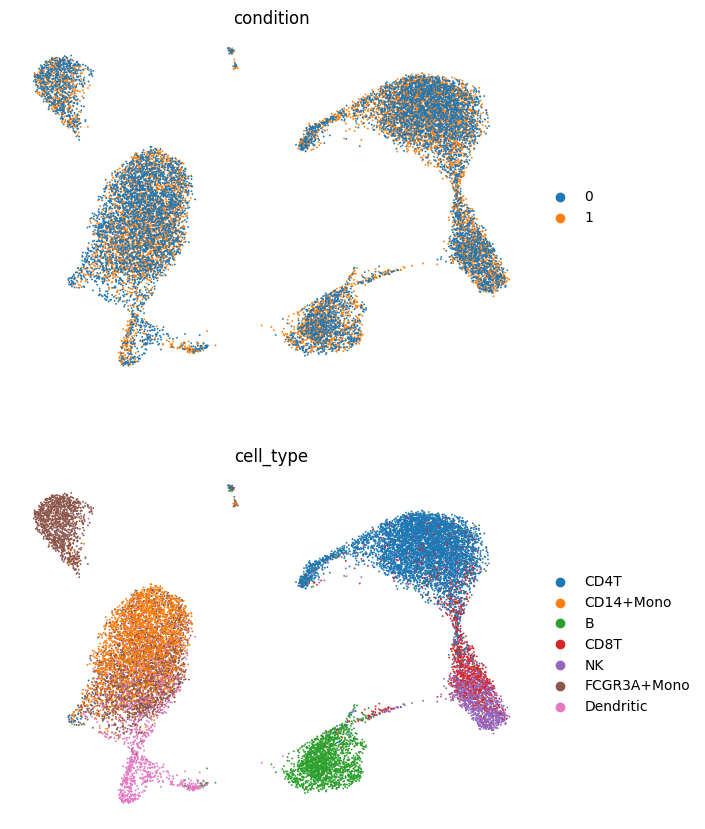

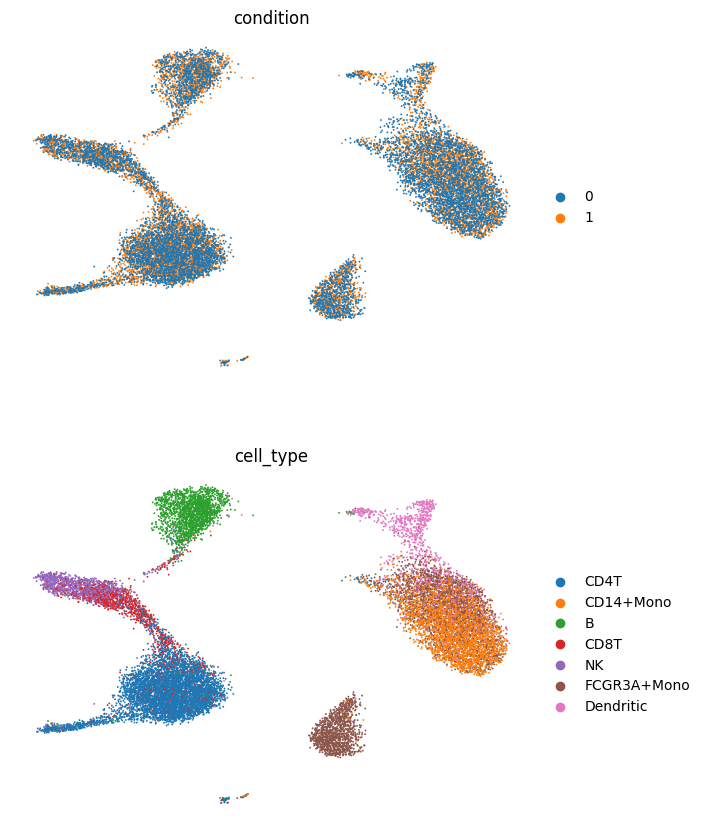

In [5]:
adata1=sc.read_h5ad("./PBMC/adata.h5ad")
sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space_PCA', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['condition', 'cell_type'], frameon=False, ncols=1)

sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['condition', 'cell_type'], frameon=False, ncols=1)

In [6]:
import rpy2.robjects as robjects
import os
os.environ["R_HOME"]="/home/xx244/.conda/envs/benchmark/lib/R"
import anndata2ri
anndata2ri.activate()

from metrics import calculate_metrics

try:
    calculate_metrics(adata1, batch_key='condition', celltype_key='cell_type', all=True, n_neighbors=25, embed='X_effect_modifier_space_PCA')
except:
    calculate_metrics(adata1, batch_key='condition', celltype_key='cell_type', all=True, n_neighbors=25, embed='X_effect_modifier_space_PCA')

Unable to determine R library path: Command '('/vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 127.


/tmp/ipykernel_3119450/4050021161.py:5: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/reproducible/metrics.py:29: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:368: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/numpy2ri.py:241: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major rele

R_HOME is already set to: /home/xx244/.conda/envs/benchmark/lib/R


LISI---


cLISI, bLISI, LISI_F1 0.9240201713503887 0.7381251428126299 0.8206773681315611


ASW---


asw_label 0.6258725672960281


asw_batch 0.9437358694002471


kBET---


0 labels consist of a single batch or is too small. Skip.


Adding diffusion to step 4


Adding diffusion to step 4


Adding diffusion to step 4


Adding diffusion to step 5


Adding diffusion to step 6


Adding diffusion to step 7


Adding diffusion to step 4
Adding diffusion to step 5


Adding diffusion to step 6
Adding diffusion to step 7


Adding diffusion to step 8


Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6


Adding diffusion to step 4


Adding diffusion to step 4
Adding diffusion to step 5


Adding diffusion to step 6
Adding diffusion to step 7


kbet_score 0.7614531557379514
graph_conn 0.971959528149517


NMI, ARI ---
NMI 0.7042585731321303
ARI 0.6519644968667847
positive and true positive rate---


                             ASW_label       ARI       NMI  1-cLISI     bLISI  \
X_effect_modifier_space_PCA   0.625873  0.651964  0.704259  0.92402  0.738125   

                             ASW_batch  kBET Accept Rate  graph connectivity  \
X_effect_modifier_space_PCA   0.943736          0.761453             0.97196   

                             PCR_batch  pos rate  true pos rate   F1 LISI  
X_effect_modifier_space_PCA   0.987338  0.757474       0.666489  0.820677  
